In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/Users/sabin/Documents/Development/Kaggle/Titanic/train.csv')

In [3]:
test = pd.read_csv('/Users/sabin/Documents/Development/Kaggle/Titanic/test.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train['Family_size'] = train['Parch'] + train['SibSp'] + 1
test['Family_size'] = test['Parch'] + test['SibSp'] + 1

In [7]:
train['Sex_encoding'] = (train['Sex'] == 'female')
test['Sex_encoding'] = (test['Sex'] == 'female')

In [8]:
train['Title'] = train['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
test['Title'] = test['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [9]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [10]:
train['Cabin_initial'] = train['Cabin'].str[0]
test['Cabin_initial'] = test['Cabin'].str[0]
train['Cabin_initial'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_initial, dtype: int64

In [11]:
# Ordinal encoding
# train['Embarked'].astype("category").cat.codes

In [12]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Family_size        0
Sex_encoding       0
Title              0
Cabin_initial    687
dtype: int64

In [13]:
label_name = 'Survived'


In [14]:
feature_names = ["Pclass", "Sex", "SibSp", "Parch", "Age", 'Family_size']
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())


X_train = pd.get_dummies(train[feature_names])
X_test = pd.get_dummies(test[feature_names])
y_train = train[label_name]

train.drop(label_name,axis=1,inplace=True)

In [ ]:
X_train = pd.get_dummies(train[feature_names])

In [ ]:
X_test = pd.get_dummies(test[feature_names])

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [16]:
from sklearn.model_selection import cross_validate

cross_validate(model, X_train, y_train, cv=5, n_jobs=-1)

{'fit_time': array([0.00292397, 0.00313592, 0.00279593, 0.00402284, 0.00317478]),
 'score_time': array([0.00087404, 0.00085807, 0.00090075, 0.00124002, 0.00114107]),
 'test_score': array([0.80446927, 0.8258427 , 0.80898876, 0.78089888, 0.83707865])}

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8114556525014125

In [18]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1)

In [34]:
from sklearn.model_selection import GridSearchCV

parameter = {'max_depth':[1,2,3,4,5,6,7], 'max_features':[0.5,0.6,0.7,0.8,0.9]}

clf = GridSearchCV(model, param_grid=parameter, scoring = 'accuracy')
clf.fit(X_train, y_train)

clf.best_score_

0.8293955181721173

In [19]:
(y_valid_predict == y_train).sum()

723

In [35]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy')

<AxesSubplot:>

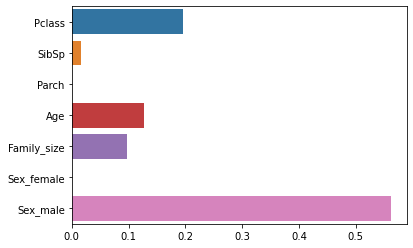

In [37]:
sns.barplot(x=model.feature_importances_,y=X_train.columns)

In [38]:
y_predict = clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_predict})

In [23]:
y_test = pd.read_csv('/Users/sabin/Documents/Development/Kaggle/Titanic/gender_submission.csv')

In [39]:
(output == y_test)['Survived'].mean()

0.9617224880382775

In [40]:
val_acc = (output == y_test)['Survived'].mean()
output.to_csv(f'my_submit_{val_acc:.2f}.csv',index=False)